#**Introduction to Image Processing in Python**
An NCSU Libraries Workshop

Speaker: Nian Xiong

>This workshop provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python. Knowledge of image processing and Python programming is not required for this workshop, but will help.

*The source of this notebook is located at https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*








##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

In [27]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB) # convert an image from one color space from B2R to RGB
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

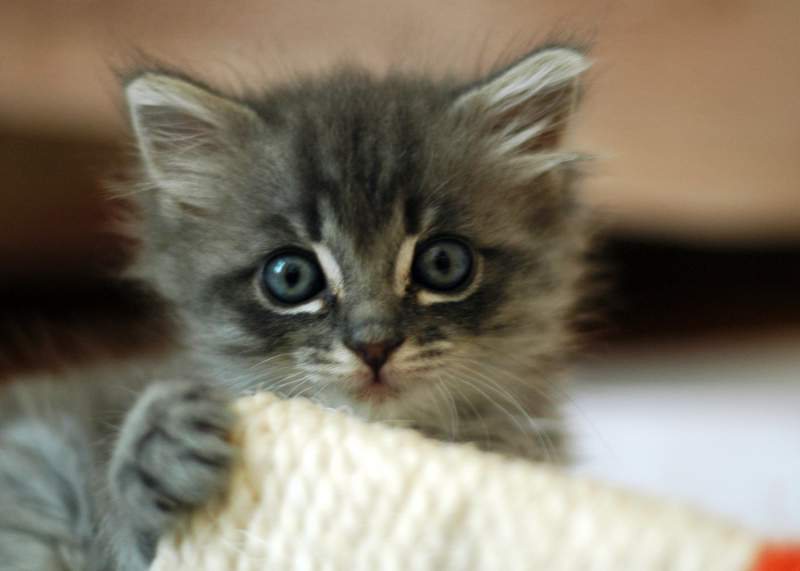

In [ ]:
## TODO: LOAD IMAGE
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/500/300,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
myImg = io.imread(url)  
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours and Histograms

In [29]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

print(image.shape)

uint8
571
800
3
(571, 800, 3)


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

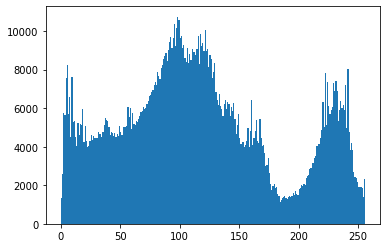

In [30]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()
# Typically zero is taken to be black, and 255 is taken to be white

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

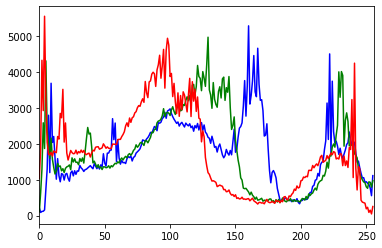

In [31]:
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
# https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html

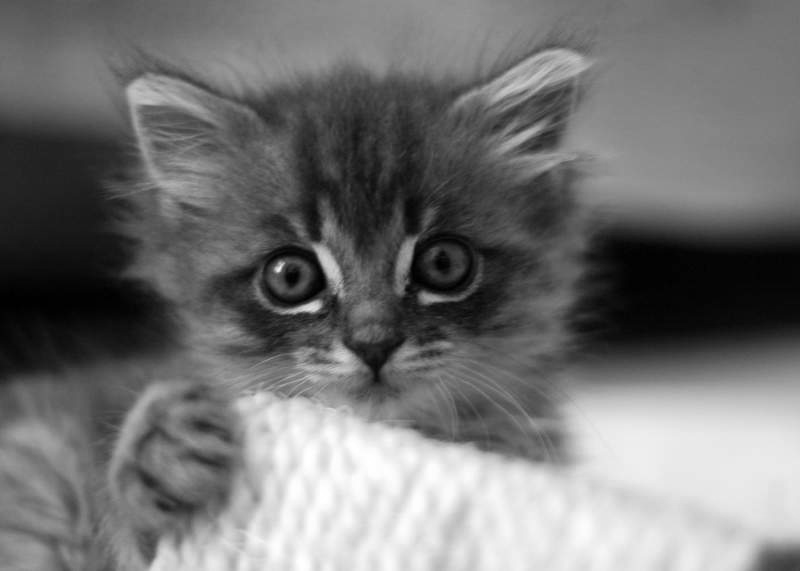

In [32]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

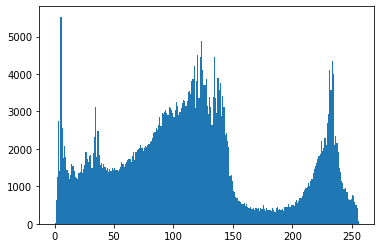

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


In [ ]:
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

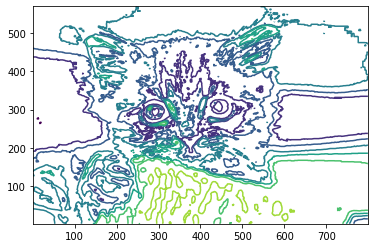

In [25]:
plt.contour(gray_image, origin = "image")

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [37]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

ValueError: ignored

#### TODO # 3: Find the contour of your own image

In [ ]:
# Your code
# plt.contour()

##Step4: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

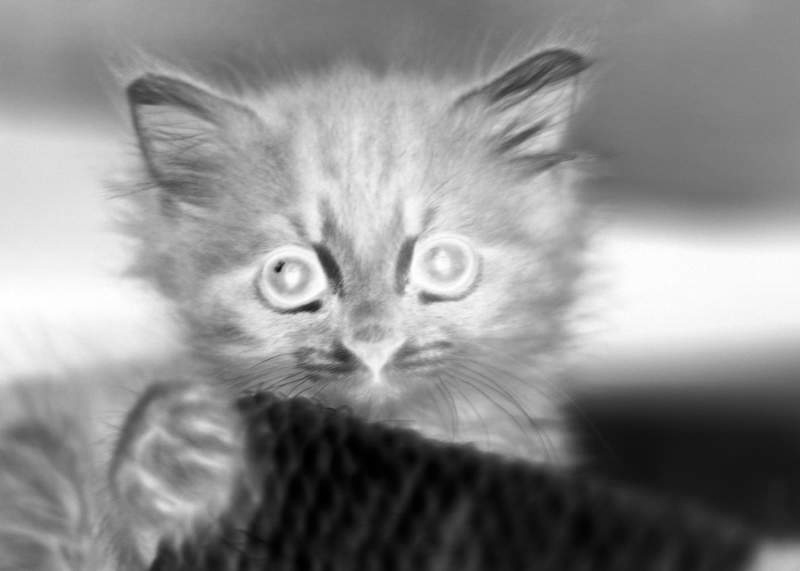

In [39]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

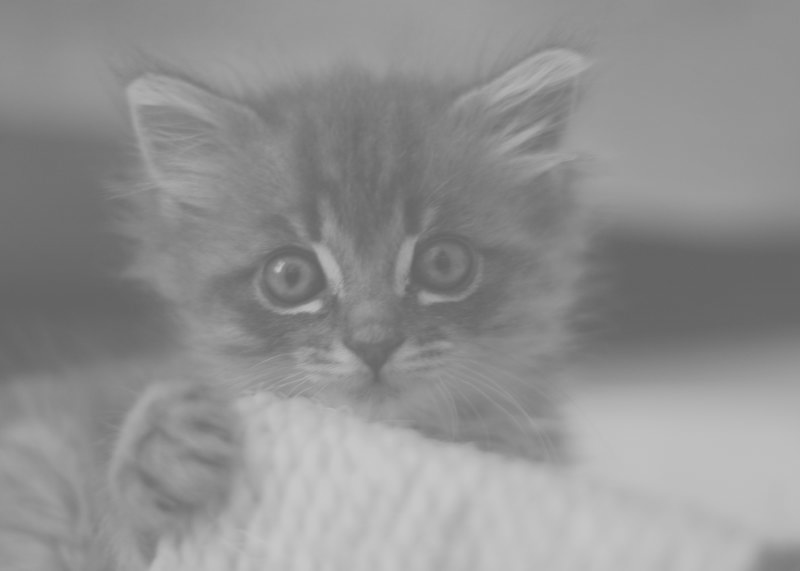

In [40]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

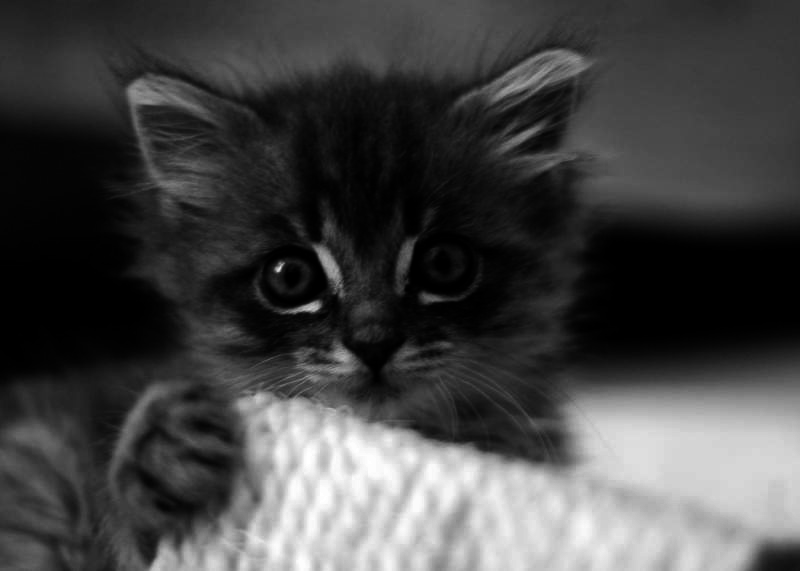

In [41]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

#### TODO #4:  Try some mathematical operations on your image


In [42]:
## Implement your code here
## myGrayImgTrans = myGrayImg...
## cv2_imshow(myGrayImgTrans)

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

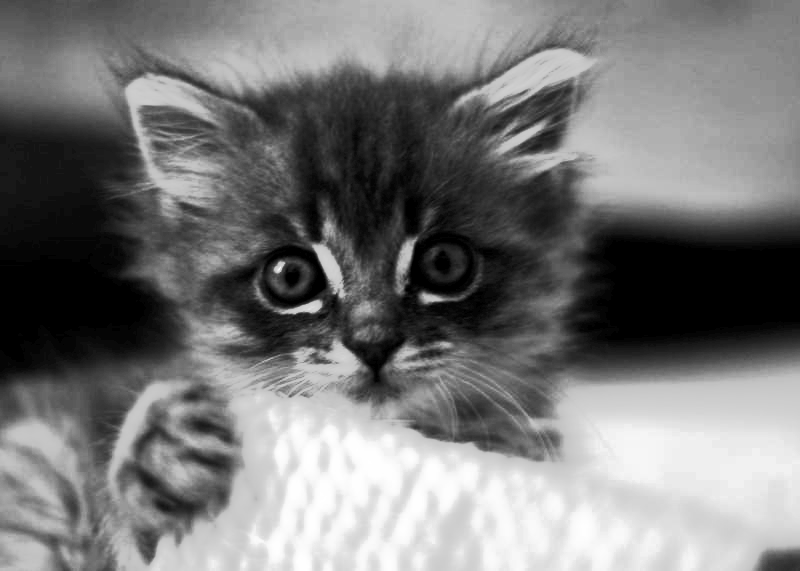

In [43]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  # normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

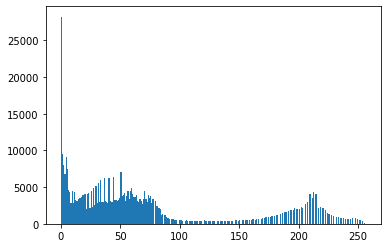

In [44]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

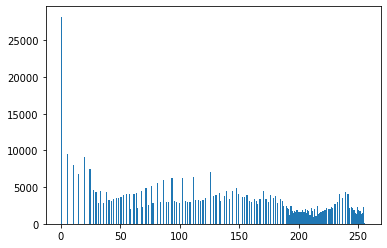

In [45]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

#### TODO # 5: Do a histogram equalization on your grayscale image



In [ ]:
## TODO: IMPLEMENT YOUR CODE HERE
## CODE INSTRUCTION
##plt.imshow()

##Step5: Fourier Transform of Gray Images
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

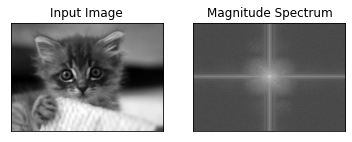

In [46]:
# Blur the grayscale image by a Guassian filter with kernel size of 10 (x = 5, y = 5)
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### TODO # 6: Generate a fourier transform of your grayscale image

In [ ]:
# todo: Implement your code here


## Step6: Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 

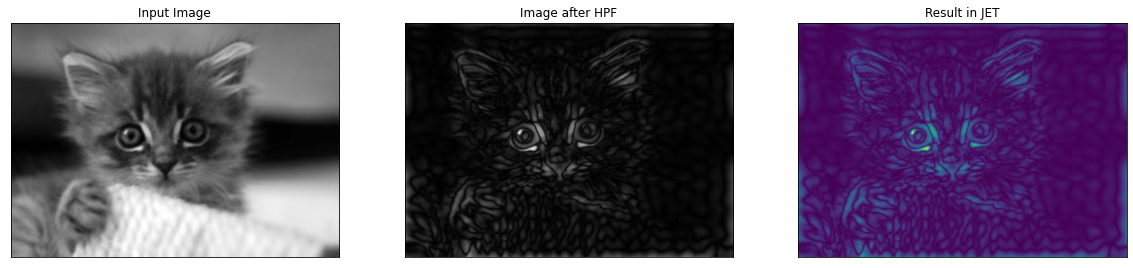

In [48]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()